### 1) Importing all the necessary libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### 2) Converting CSV file into DataFrame

In [9]:
data = pd.read_csv("insurance.csv")

In [11]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 3 (a). Shape of data 

In [12]:
data.shape # Shape of data

(1338, 7)

### There are 1338 observations and 7 attributes

### 3 (b). Datatypes of each attributes

In [13]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### 3 (c). Checking the presence of missing values


In [14]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### 3 (d). Five point summary of all numerical attributes

In [16]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### 3 (e). Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

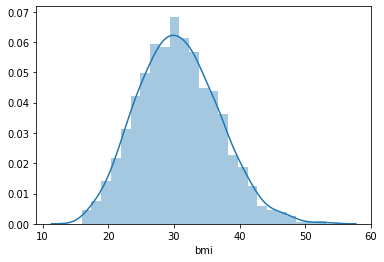

In [17]:
sns.distplot(data["bmi"])  # Distribution of bmi column. Data seems to be normally distributed

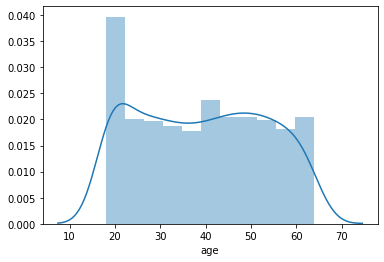

In [41]:
sns.distplot(data["age"]) # Distribution of age column

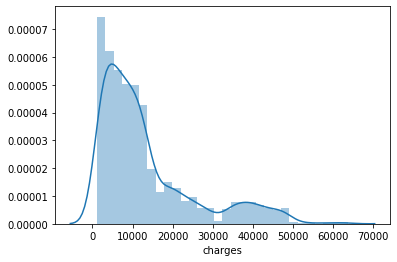

In [18]:
sns.distplot(data['charges']) # Distrbution of charges column : Data seems to be left skewed

### 3 (f). Measure of skewness of ‘bmi’, ‘age’ and ‘charges’columns 

In [20]:
print("Skewness value of bmi column     is ",data['bmi'].skew())
print("Skewness value of age column     is ",data['age'].skew())
print("Skewness value of charges column is ",data['charges'].skew())

Skewness value of bmi column     is  0.2840471105987448
Skewness value of age column     is  0.05567251565299186
Skewness value of charges column is  1.5158796580240388


#### bmi seems to be slightly skewed as per the value of skewness
#### age seems to be normally distributed
#### charges seems to be highly skewed depending on the value of skewness

### 3 (g). Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges' columns


### Outliers in bmi column

In [48]:
IQR = np.subtract(*np.percentile(data['bmi'], [75, 25]))
print('IQR for bmi :',IQR)

IQR for bmi : 8.3975


In [53]:
# Outliers for bmi

Q1 = np.percentile(data['bmi'], 25)
Q3 = np.percentile(data['bmi'], 75)
IQR = Q3 - Q1
Limit = 1.5 * IQR
lower_Limit, upper_Limit = Q1 - Limit, Q3 + Limit

outliers = [x for x in data['bmi'] if x < lower_Limit or x > upper_Limit]
print('Identified outliers for bmi : %d' % len(outliers))

Identified outliers for bmi : 9


In [54]:
upper_Limit

47.290000000000006

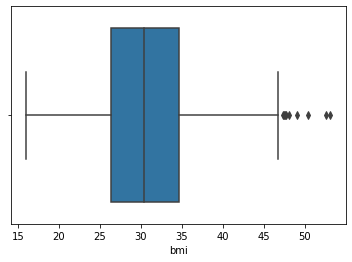

In [47]:
sns.boxplot(data["bmi"])

In [59]:
data[data['bmi'] > 47.2] # Outliers data for bmi

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


### Outliers in age column 

In [60]:
IQR = np.subtract(*np.percentile(data['age'], [75, 25]))
print('IQR for age :',IQR)

IQR for age : 24.0


In [61]:
# Outliers for age

Q1, Q3 = np.percentile(data['age'], 25), np.percentile(data['age'], 75)
IQR = Q3 - Q1
Limit = 1.5 * IQR
lower_Limit, upper_Limit = Q1 - Limit, Q3 + Limit

outliers = [x for x in data['age'] if x < lower_Limit or x > upper_Limit]
print('Identified outliers for age : %d' % len(outliers))

Identified outliers for age : 0


### No outliers present in age

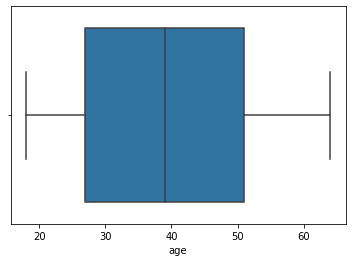

In [39]:
sns.boxplot(data['age'])    # No Outliers present in Age

### Outlier for charges column

In [32]:
IQR = np.subtract(*np.percentile(data['charges'], [75, 25]))
print('IQR for charges :',IQR)

IQR for charges : 11899.625365


In [36]:
# Outliers for charges

Q1, Q3 = np.percentile(data['charges'], 25), np.percentile(data['charges'], 75)
IQR = Q3 - Q1
Limit = 1.5 * IQR
lower_Limit, upper_Limit = Q1 - Limit, Q3 + Limit

outliers = [x for x in data['charges'] if x < lower_Limit or x > upper_Limit]
print('Identified outliers for charges out of 1138: %d' % len(outliers))

Identified outliers for charges out of 1138: 139


In [37]:
upper_Limit

34489.350562499996

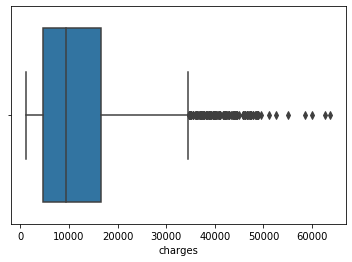

In [47]:
sns.boxplot(data["charges"])   # data seems to be left skewed

In [38]:
data[data["charges"]>34489.350562499996]  #Outlier data

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


### 3 (h). Distribution of categorical columns (include children) 

### Bi-variate 

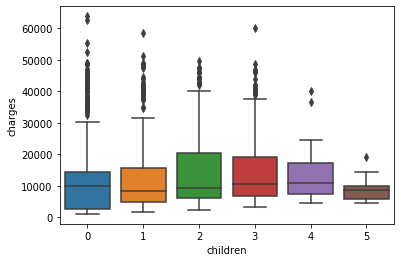

In [64]:
sns.boxplot(x='children', y='charges', data= data);

#### Charges paid by the people having 0 childern in some cases is significantly high than people with 5 children

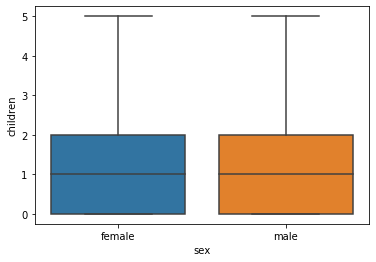

In [73]:
sns.boxplot(x='sex', y='children', data= data)

#### This shows that no. of children for male and female have similar distribution

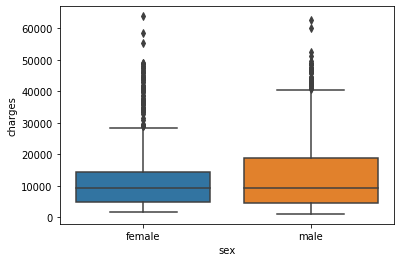

In [71]:
sns.boxplot(x='sex', y='charges', data= data)

#### Both the male and female have paid the extreme charges. Female has more outliers while more males paid higher charges.

### Uni-variate

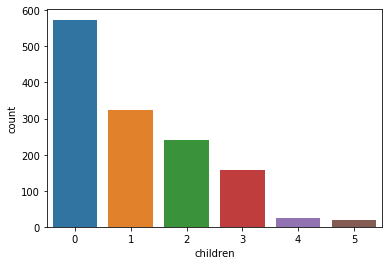

In [69]:
sns.countplot(data['children']);

#### This graph shows that the most no. of people has no childern in data and there are very few people with 5 childrens

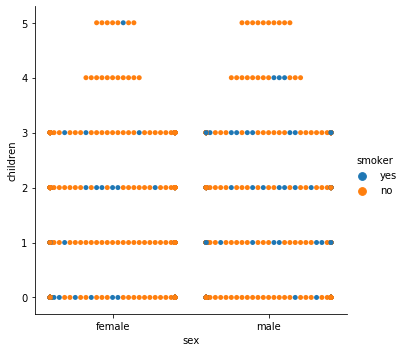

In [68]:
sns.catplot(x="sex", y="children", data=data, hue='smoker', kind="swarm")

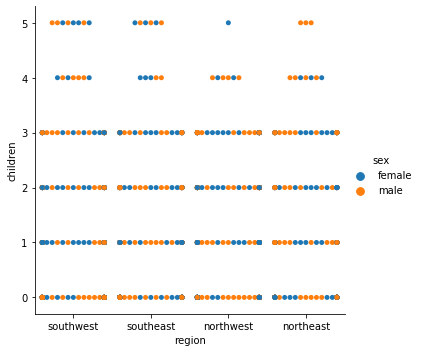

In [65]:
sns.catplot(x="region", y="children", data=data, hue='sex', kind="swarm")

### 3 (i). Pair plot that includes all the columns of the dataframe 

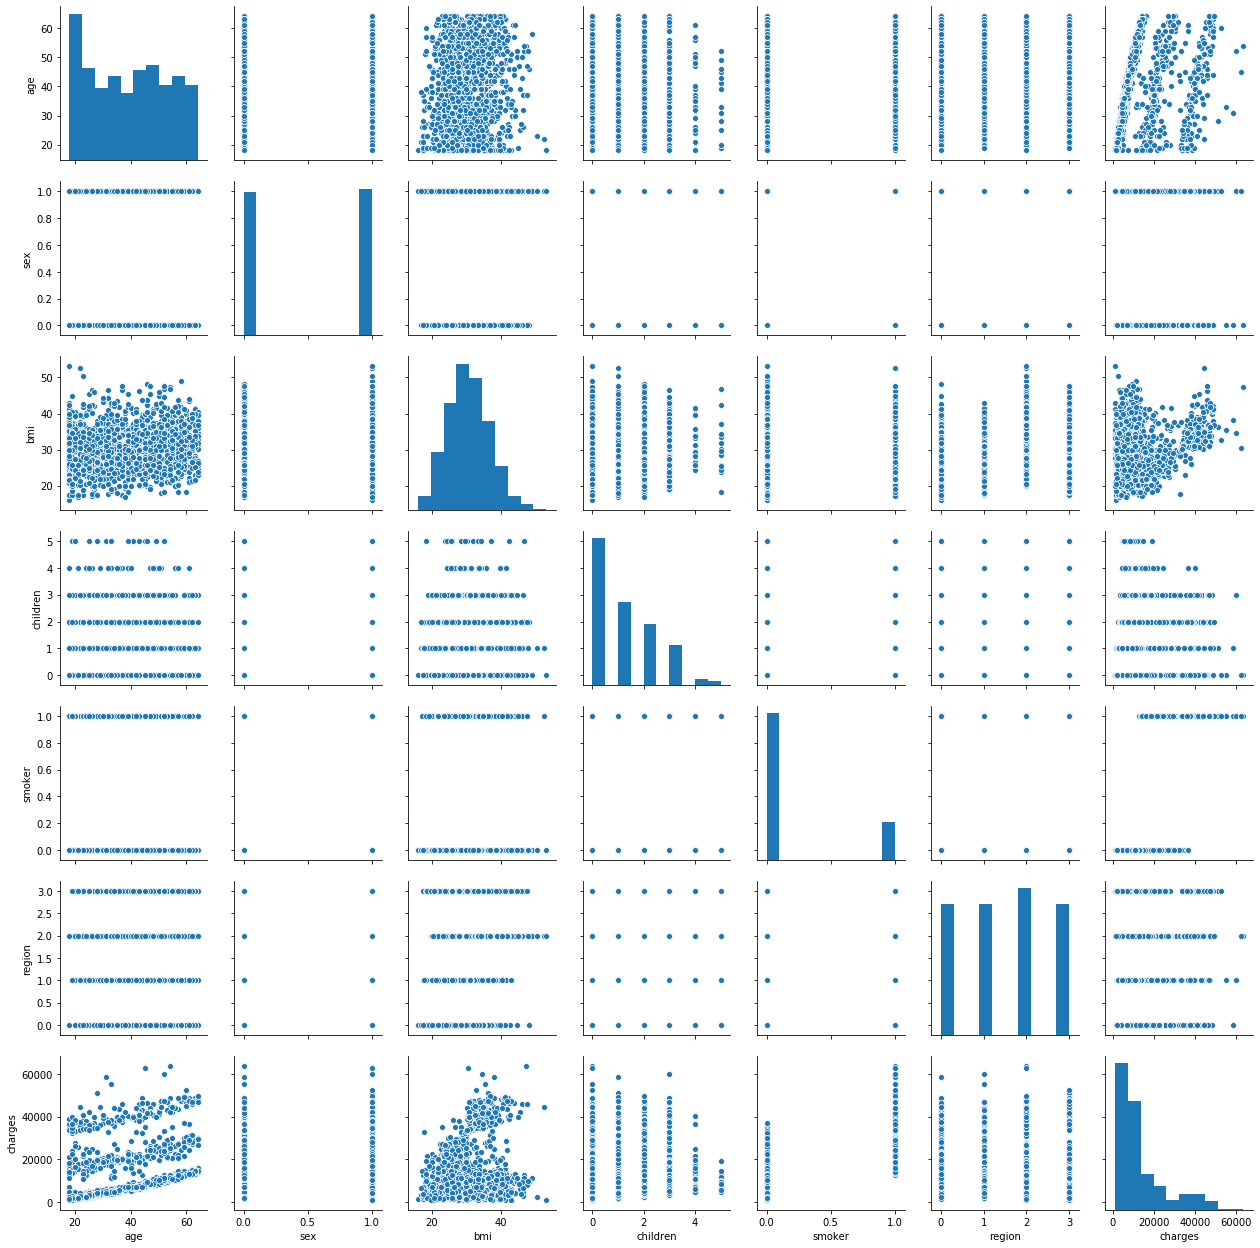

In [25]:
#Label encoding the variables before doing a pairplot because pairplot ignores strings
import copy
from sklearn.preprocessing import LabelEncoder
data_encoded = copy.deepcopy(data)
data_encoded.loc[:,['sex', 'smoker', 'region']] = data.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 
sns.pairplot(data_encoded);

### 4 (a). Do charges of people who smoke differ significantly from the people who don't?

In [137]:
#Sampling Data of people age <=24
aged_24 = data[data.age <=24]
aged_24.smoker.value_counts()

no     218
yes     60
Name: smoker, dtype: int64

In [138]:
sample_smokers = aged_24[aged_24['smoker'] == 'yes'].charges  #excluding elements to match the size 2 samples
sample_non_Smokers = aged_24[aged_24['smoker'] == 'no'].charges.iloc[:-158] 

In [139]:
#Checking the count of two samples
print(sample_smokers.count())
print(sample_non_Smokers.count())

60
60


In [140]:
#Calculating Variance
v1, v2 = np.var(sample_smokers) , np.var(sample_non_Smokers)
print(v1,v2)

96714493.42563541 20983197.161918547


#### Variance in charges of people who smoke is higher than who dont. But is the difference statistically significant?

#### Ho : Variation in charges of people who smoke and who dont smoke is equal same
#### Ha : Variation in charges of people who smoke is higher than who dont smoke 

In [141]:
n = 60  # number of samples
dof = n - 1  # degrees of freedom
alpha = 0.05  # significance level
chi_critical = 74.40    # critical chi_squared statistic. From the table 

In [142]:
chi = (dof*v1)/v2
print("chi : ",chi,"chi_critical : ",chi_critical )
if chi < chi_critical:
    print("Since the test statistic is less than the critical value, we fail to reject the null")
else:
    print("Since the test statistic is more than the critical value, we reject the null")

chi :  271.9392601651922 chi_critical :  74.4
Since the test statistic is more than the critical value, we reject the null


### 4 (b). Does bmi of males differ significantly from that of females?


#### Test of Variance

In [143]:
#Sampling Data : for age = 19
aged_19 = data[data.age == 19]
aged_19.sex.value_counts()

male      35
female    33
Name: sex, dtype: int64

In [144]:
sample_male = aged_19[aged_19['sex'] == 'male'].bmi.iloc[:-2]  #excluding the last two elements to match the size 2 samples
sample_female = aged_19[aged_19['sex'] == 'female'].bmi

In [145]:
print(sample_male.count())
print(sample_female.count())

33
33


In [146]:
v1, v2 = np.var(sample_female) , np.var(sample_male)
print(v1,v2)

30.765708585858583 35.05058650137741


#### Variances of bmi of men is higher than it is for women. But is the difference statistically significant?

#### Ho : Variation in bmi of men and women is equal same
#### Ha : Variation in bmi of men is greater than it is in women

In [147]:
n = 33  # number of samples
dof = n - 1  # degrees of freedom
alpha = 0.05  # significance level
chi_critical = 46.19    # critical chi_squared statistic. From the table 

In [148]:
chi = (dof*v1)/v2
print("chi : ",chi,"chi_critical : ",chi_critical )
if chi < chi_critical:
    print("Since the test statistic is less than the critical value, we fail to reject the null")
else:
    print("Since the test statistic is more than the critical value, we reject the null")

chi :  28.088051385639037 chi_critical :  46.19
Since the test statistic is less than the critical value, we fail to reject the null


### 4 (c). Is the proportion of smokers significantly different in different genders?

 

#### Test of proportions 

* 'sex' and 'smoker' are two categorical variables
* We want to see if the proportion of smokers in the female population is significantly different from the male population

#### Ho = The proportions are equal
#### Ha = The two proportions are not equal

In [149]:
female_smokers = data[data['sex'] == 'female'].smoker.value_counts()[1]  # number of female smokers
male_smokers = data[data['sex'] == 'male'].smoker.value_counts()[1] # number of male smokers
no_of_females = data.sex.value_counts()[1] # number of females in the data
no_of_males = data.sex.value_counts()[0] #number of males in the data

In [205]:
print([female_smokers, male_smokers] , [no_of_females, no_of_males])
print(f' Proportion of smokers in females, males = {round(female_smokers/no_of_females,2)}%, {round(male_smokers/no_of_males,2)}% respectively')

[115, 159] [662, 676]
 Proportion of smokers in females, males = 0.17%, 0.24% respectively


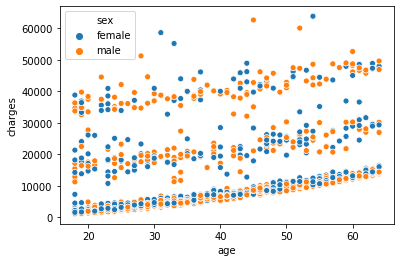

In [206]:
sns.scatterplot(data.age, data.charges,hue=data.sex  )


#### The proportions are different but are they statistically significant?

In [151]:
from statsmodels.stats.proportion import proportions_ztest

stat, pval = proportions_ztest([female_smokers, male_smokers] , [no_of_females, no_of_males])

if pval < 0.05:
    print(f'With a p-value of {round(pval,4)} the difference is significant. Therefore |We reject the null|')
else:
    print(f'With a p-value of {round(pval,4)} the difference is not significant. Therefore |We fail to reject the null|')

With a p-value of 0.0053 the difference is significant. Therefore |We reject the null|


### 4 (d). Is the distribution of bmi across women with no children, one child and two children, the same ?
 

### Ho = "No. of children has no effect on bmi"   
### Ha = "No. of children has an effect on bmi" 

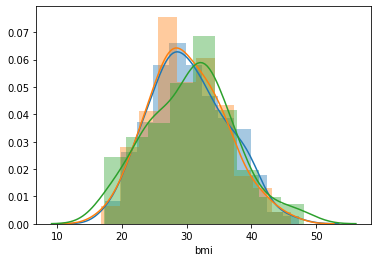

In [191]:
sns.distplot(data[(data["children"]==0) & (data['sex']=='female')].bmi)
sns.distplot(data[(data["children"]==1) & (data['sex']=='female')].bmi)
sns.distplot(data[(data["children"]==2) & (data['sex']=='female')].bmi)

In [199]:
data_children_0 = data[(data["children"]==0) & (data['sex']=='female')]
data_children_1 = data[(data["children"]==1) & (data['sex']=='female')]
data_children_2 = data[(data["children"]==2) & (data['sex']=='female')]

In [201]:
f_stat, p_value = stats.f_oneway(data_children_0.bmi,data_children_1.bmi,data_children_2.bmi)

In [202]:
p_value

0.7158579926754841

In [204]:
if p_value < 0.05:
    print(f'With a p-value of {round(p_value,4)} No. of children has an effect on bmi. Therefore |We reject the null|')
else:
    print(f'With a p-value of {round(p_value,4)} No. of children has no effect on bmi. Therefore |We fail to reject the null|')

With a p-value of 0.7159 No. of children has no effect on bmi. Therefore |We fail to reject the null|
